In [21]:
import os
import numpy as np
import pandas as pd
from keras.utils import load_img
from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten, Conv2D, MaxPooling2D
from keras.utils import to_categorical
from keras.optimizers import Adam
from sklearn.model_selection import train_test_split
import tensorflow as tf
from tensorflow.keras.preprocessing.image import load_img
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from keras.utils.image_utils import img_to_array
from keras.models import load_model
from keras.optimizers import Adam
from PIL import Image
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
import matplotlib.pyplot as plt


In [22]:
# from google.colab import drive
# drive.mount('/content/drive')

# path = '/content/drive/My Drive/backup_20_2_2023/HK2_2023/NienLuan/sources/'

# from google.colab import drive
# drive.mount('/content/drive')

# path = '/content/drive/My Drive/backup_20_2_2023/HK2_2023/NienLuan/sources/'

# path = '.\'

data_path = ".\origin_data"
model_path = ".\models"

In [23]:
# data_path = path + "origin_data"
# 0:20 1:30 2:50 3:60 4:70
label_name = ["Giới hạn tốc độ 40km/h", "Giới hạn tốc độ 50km/h", "Giới hạn tốc độ 60km/h",
          "Hết hạn giới hạn tốc độ tối đa 40km/h", "Hết hạn giới hạn tốc độ tối đa 50km/h",
          "Hết hạn giới hạn tốc độ tối đa", "Vào khu vực khu dân cư", "Ra khỏi khu vực khu dân cư", "Cấm", "Stop",
          "Chợ"
]

In [24]:
classes = len(label_name)
data = []
labels = []
for i in range(classes):

    # print('i', i)
    path = os.path.join(data_path,str(i))
    # print('path', path)
    images = os.listdir(path)
    for a in images:
        try:
            img = load_img( 
                        os.path.join(data_path,str(i),a),
                        grayscale=False,
                        color_mode="rgb",
                        target_size=(150,150),
            )
            img = np.array(img)
            data.append(img)
            labels.append(i)
            
        except:
            print('khong the load file')
print(pd.value_counts(labels))
X = np.array(data)
y = np.array(labels)
# X,y = load_and_resize_image(4, data_path, (150,150), False)

1     2418
2     1668
8     1168
9      835
0      549
5      320
3      315
10     261
7      254
4      236
6      189
dtype: int64


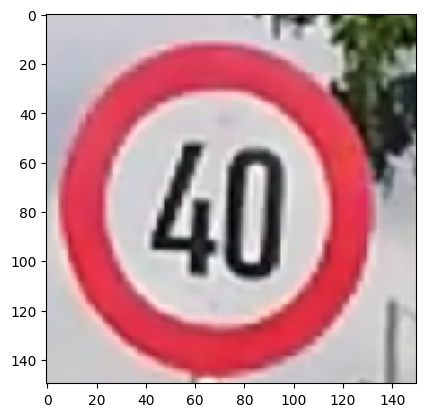

In [25]:
plt.figure()
plt.imshow(X[10])
plt.show()

In [26]:
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size = 0.2, random_state = 50)
print(X_train.shape, X_test.shape, y_train.shape, y_test.shape)

(6570, 150, 150, 3) (1643, 150, 150, 3) (6570,) (1643,)


In [27]:
# # resize value (0-255) to (0-1) on X_train, X_test
X_train = X_train/255.0
X_test = X_test/255.0

print(X_train.shape, X_test.shape, y_train.shape, y_test.shape)

#one-hot encoding the labels
y_train_one_hot = to_categorical(y_train, classes)
y_test_one_hot = to_categorical(y_test, classes)
print(y_train_one_hot.shape, y_test_one_hot.shape)

(6570, 150, 150, 3) (1643, 150, 150, 3) (6570,) (1643,)
(6570, 11) (1643, 11)


In [28]:
# def built_model(input_shape, classes):
#     model = Sequential()
#     model.add(Conv2D(32, kernel_size=(3, 3), padding='same', activation='relu', input_shape=input_shape))
#     model.add(Conv2D(32, kernel_size=(3, 3), padding='same',activation='relu'))
#     model.add(MaxPooling2D(pool_size=(2, 2)))
#     model.add(Conv2D(64, kernel_size=(3, 3),padding='same', activation='relu'))
#     model.add(Conv2D(64, kernel_size=(3, 3),padding='same', activation='relu'))
#     model.add(MaxPooling2D(pool_size=(2, 2)))
#     model.add(Conv2D(128, kernel_size=(3, 3),padding='same', activation='relu'))
#     model.add(Conv2D(128, kernel_size=(3, 3),padding='same', activation='relu'))
#     model.add(MaxPooling2D(pool_size=(2, 2)))
#     model.add(Conv2D(256, kernel_size=(3, 3),padding='same', activation='relu'))
#     model.add(Conv2D(256, kernel_size=(3, 3),padding='same', activation='relu'))
#     model.add(Conv2D(256, kernel_size=(3, 3),padding='same', activation='relu'))
#     model.add(MaxPooling2D(pool_size=(2, 2)))
#     model.add(Conv2D(512, kernel_size=(3, 3),padding='same', activation='relu'))
#     model.add(Conv2D(512, kernel_size=(3, 3),padding='same', activation='relu'))
#     model.add(Conv2D(512, kernel_size=(3, 3),padding='same', activation='relu'))
#     model.add(MaxPooling2D(pool_size=(2, 2)))
#     model.add(Conv2D(512, kernel_size=(3, 3),padding='same', activation='relu'))
#     model.add(Conv2D(512, kernel_size=(3, 3),padding='same', activation='relu'))
#     model.add(Conv2D(512, kernel_size=(3, 3),padding='same', activation='relu'))
#     model.add(MaxPooling2D(pool_size=(2, 2)))

#     model.add(Flatten())
#     model.add(Dense(4096, activation = 'relu'))
#     model.add(Dense(4096, activation = 'relu'))
#     model.add(Dense(classes, activation='softmax'))
#     model.compile(optimizer=Adam(learning_rate=0.0001), loss='categorical_crossentropy', metrics=['accuracy'])
#     print(model.summary())
#     return model
 

In [29]:
model = tf.keras.applications.vgg19.VGG19(    
    include_top=True,
    weights=None,
    input_tensor=None,
    input_shape=(150, 150,3),
    classes=classes,
    classifier_activation='softmax')
model.summary()
model.compile(optimizer='adam', 
              loss='categorical_crossentropy', 
              metrics=['accuracy'])

Model: "vgg19"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_3 (InputLayer)        [(None, 150, 150, 3)]     0         
                                                                 
 block1_conv1 (Conv2D)       (None, 150, 150, 64)      1792      
                                                                 
 block1_conv2 (Conv2D)       (None, 150, 150, 64)      36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, 75, 75, 64)        0         
                                                                 
 block2_conv1 (Conv2D)       (None, 75, 75, 128)       73856     
                                                                 
 block2_conv2 (Conv2D)       (None, 75, 75, 128)       147584    
                                                                 
 block2_pool (MaxPooling2D)  (None, 37, 37, 128)       0     

In [30]:
# model = built_model(X_train.shape[1:], classes )

In [31]:
history = model.fit(x = X_train, y = y_train_one_hot, batch_size=64, epochs=10, validation_data = (X_test,y_test_one_hot))

Epoch 1/10
  1/103 [..............................] - ETA: 1:00:40 - loss: 2.3979 - accuracy: 0.0156

KeyboardInterrupt: 

In [ ]:
pred = model.predict(X_test, batch_size = 32)
pred = np.argmax(pred, axis = 1)

52/52 [==============================] - 32s 611ms/step


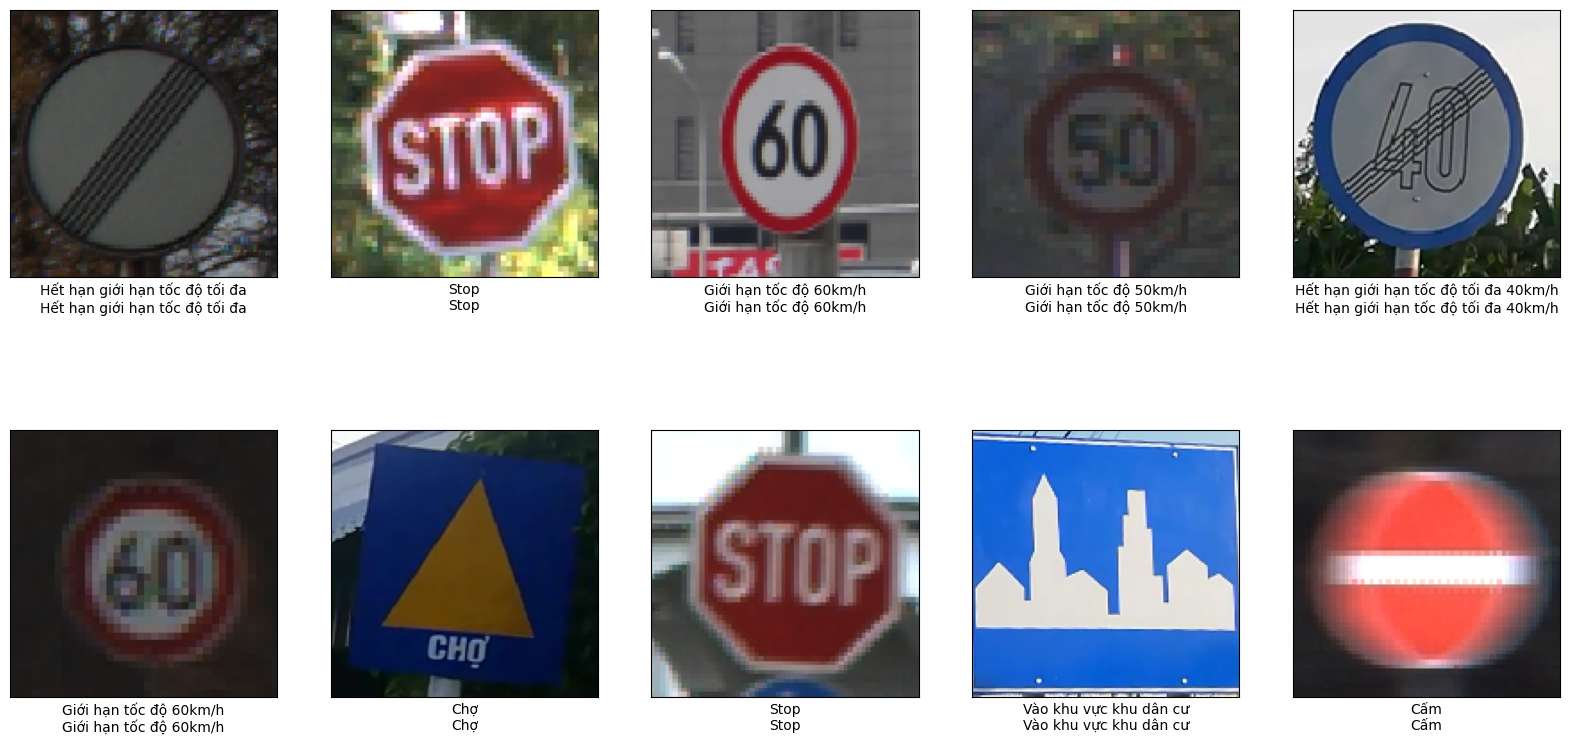

In [ ]:
plt.figure(figsize=(20,10))
for i in range(10):
    plt.subplot(2,5,i+1)
    plt.xticks([])
    plt.yticks([])
    # plt.grid(False)
    plt.imshow(X_test[i], cmap=plt.cm.binary)
    plt.xlabel(label_name[pred[i]]+"\n"+label_name[y_test[i]])
plt.show()

In [ ]:
matrix = confusion_matrix(y_test, pred)
print(matrix)

[[102   0   0   0   0   0   0   0   0   0   0]
 [  0 465   4   0   0   2   0   0   0   0   0]
 [  2   2 322   0   0   0   0   0   0   0   0]
 [  0   0   0  70   0   0   0   0   0   0   0]
 [  0   0   0   0  43   1   0   0   0   0   0]
 [  0   0   0   2   0  60   0   0   0   0   0]
 [  0   0   0   0   0   0  37   0   0   0   0]
 [  0   0   0   1   0   0   0  59   0   0   0]
 [  0   0   0   0   0   0   0   0 237   0   0]
 [  0   0   0   0   0   0   0   0   2 172   0]
 [  0   0   0   0   0   0   0   0   0   0  60]]


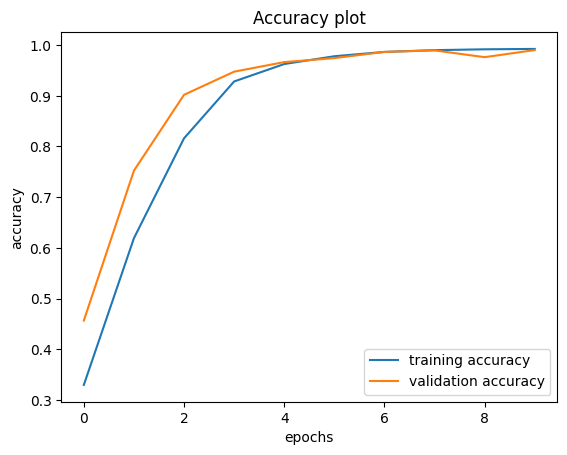

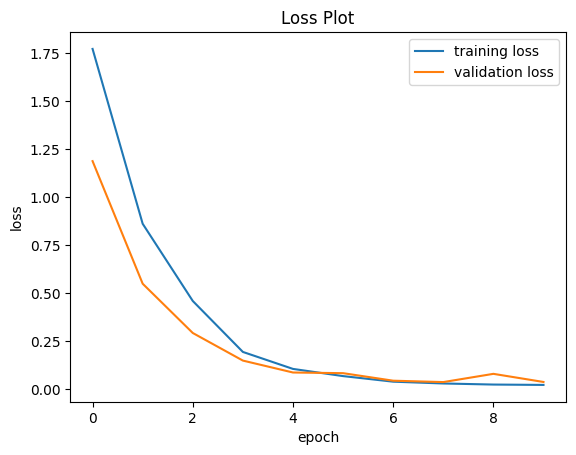

In [ ]:
#plotting graphs for accuracy
plt.figure(0)
plt.plot(history.history['accuracy'], label = 'training accuracy')
plt.plot(history.history['val_accuracy'], label = 'validation accuracy')
plt.title('Accuracy plot')
plt.xlabel('epochs')
plt.ylabel('accuracy')
plt.legend()
plt.show()

plt.figure(1)
plt.plot(history.history['loss'], label = "training loss")
plt.plot(history.history['val_loss'], label = "validation loss")
plt.title("Loss Plot")
plt.xlabel("epoch")
plt.ylabel("loss")
plt.legend()
plt.show()

In [ ]:
model.save(model_path + '/v7.h5')

In [ ]:
model_load = load_model(model_path+ "/v7.h5")

predict_test = model_load.predict(X_test)
argmax_predict_test = np.argmax(predict_test, axis = 1)
matrix = confusion_matrix(y_test, argmax_predict_test)
print(matrix)

52/52 [==============================] - 31s 596ms/step
[[102   0   0   0   0   0   0   0   0   0   0]
 [  0 465   4   0   0   2   0   0   0   0   0]
 [  2   2 322   0   0   0   0   0   0   0   0]
 [  0   0   0  70   0   0   0   0   0   0   0]
 [  0   0   0   0  43   1   0   0   0   0   0]
 [  0   0   0   2   0  60   0   0   0   0   0]
 [  0   0   0   0   0   0  37   0   0   0   0]
 [  0   0   0   1   0   0   0  59   0   0   0]
 [  0   0   0   0   0   0   0   0 237   0   0]
 [  0   0   0   0   0   0   0   0   2 172   0]
 [  0   0   0   0   0   0   0   0   0   0  60]]
